# The model to predict house prices

**Daria Tkach**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


## Abstract

In this work, we had a dataset with descriptions of houses, like construction date, living area square feet, size of the garage, etc. and we would like to predict their prices. It was found that the cost houses histogram is asymmetric and differs from the normal distribution, which is why was used log prices were.It was assumed linear regression was used to build the model. To improve the accuracy of the model, the data were preliminarily prepared: they were cleared of NaN values and the most relevant features (having a correlation coefficient of at least 0.3) were selected. The resulting model has a high coefficient of determination $R^2$ = 0.886. The assessment of the reliability of the model on the test dataset confirmed the correctness of the constructed linear regression $R^2$ = 0.837.

[Back to top](#Index)


## 1. Introduction

The problem we have to solve is predicting the price of a house. To solve this problem we have an open dataset with house prices. Data in it contains all the important features as well as the recommended price — exactly what we need for our use case. Thus, we use this dataset for building the price recommendation algorithm. Because If we need to predict the price of a house, then we will use a regression model. The simplest model is linear regression because to build a model, several independent variables will be used, then it will be a multiple linear regression.
To solve the problem, we will perform the following steps.:
1. First, we download the dataset and make sure that the data presented in it correspond to our task.
2. Next, we do some preliminary analysis of the data. Here we must evaluate the type of distribution and evaluate whether there is any relationship between the data obtained (at this stage, qualitatively).
3. After that, to prepare the data, we select the columns that contain numerical information. It is also necessary to find columns with cells containing NaN and replace them with the average values in this column. Thus, we will not make significant changes to the statistics in this column.
4. To select the features that are most related to the price of the house, which we will use to build the model, we will evaluate the correlation coefficients between the columns that contain numerical characteristics. To build a model, we select characteristics for which the modulus of the correlation coefficient is higher than 0.3, 0.5, 0.7.
5. Then we implement a linear regression model in Python using Sklearn.
6. Next, The resulting model must be verified on a test data set.
7. Finally, based on the results obtained, it is necessary to draw conclusions and, if necessary, repeat the previous steps to improve them.

[Back to top](#Index)

## 2. The Data


[Back to top](#Index)

### 2.1 Import the Data

To solve the problem first we import the necessary libraries NumPy, Pandas, Matplotlib, and Seaborn to make calculations and draw histograms and plots and import the data for the project. 

In [567]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [568]:
data = 'houseSmallData.csv'
train_data = pd.read_csv(data)
train_data.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [569]:
train_data.shape

(100, 82)

We have established that the data set contains 100 rows and 82 columns, which contain both numeric and textual data.

Below are explanations for columns that contain numeric data:

*LotFrontage*: Linear feet of street connected to property

*LotArea*: Lot size in square feet

*OverallQual*: Rates the overall material and finish of the house

*OverallCond*: Rates the overall condition of the house

*YearBuilt*: Original construction date

*YearRemodAdd*: Remodel date (same as construction date if no remodeling or additions)

*MasVnrArea*: Masonry veneer area in square feet

*BsmtFinSF1*: Type 1 finished square feet

*BsmtFinSF2*: Type 2 finished square feet

*BsmtUnfSF*: Unfinished square feet of basement area

*TotalBsmtSF*: Total square feet of basement area

*1stFlrSF*: First Floor square feet

*2ndFlrSF*: Second floor square feet

*LowQualFinSF*: Low quality finished square feet (all floors)

*GrLivArea*: Above grade (ground) living area square feet

*BsmtFullBath*: Basement full bathrooms

*BsmtHalfBath*: Basement half bathrooms

*FullBath*: Full bathrooms above grade

*HalfBath*: Half baths above grade

*Bedroom*: Bedrooms above grade (does NOT include basement bedrooms)

*Kitchen*: Kitchens above grade

*TotRmsAbvGrd*: Total rooms above grade (does not include bathrooms)

*Fireplaces*: Number of fireplaces

*GarageYrBlt*: Year garage was built

*GarageCars*: Size of garage in car capacity

*GarageArea*: Size of garage in square feet

*GarageQual*: Garage quality

*WoodDeckSF*: Wood deck area in square feet

*OpenPorchSF*: Open porch area in square feet

*EnclosedPorch*: Enclosed porch area in square feet

*3SsnPorch*: Three season porch area in square feet

*ScreenPorch*: Screen porch area in square feet

*PoolArea*: Pool area in square feet

*MiscVal*: $Value of miscellaneous feature

*MoSold*: Month Sold (MM)

*YrSold*: Year Sold (YYYY)

[Back to top](#Index)

### 2.2 Data Exploration

To estimate the type of distribution, let's build a histogram of the "SalePrice" property. It shows that the distribution is asymmetric, which is confirmed by the asymmetry coefficient, which is equal to 1.2. Having rebuilt the histogram of house prices in the log(SalePrice), we found that the histogram corresponds to a normal distribution (the asymmetry coefficient is -0.1). Thus, in the future, the model will be built using log(SalePrice).

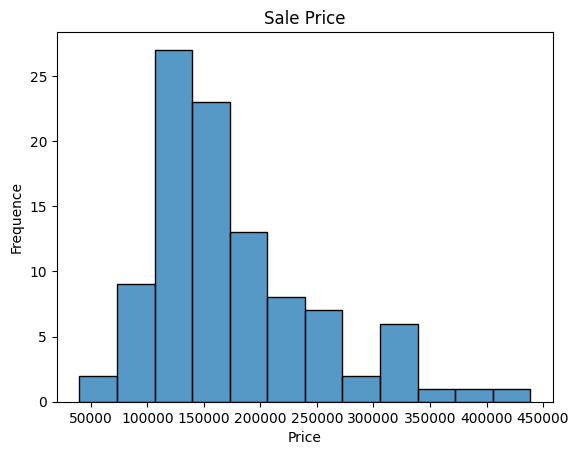

In [570]:
# histogram of prices
plt.xlabel('Price')
plt.ylabel('Frequence')
plt.title('Sale Price')
sns.histplot(train_data['SalePrice'])
plt.show()

In [571]:
# try to make normal distribution
log_price = np.log(train_data['SalePrice'])

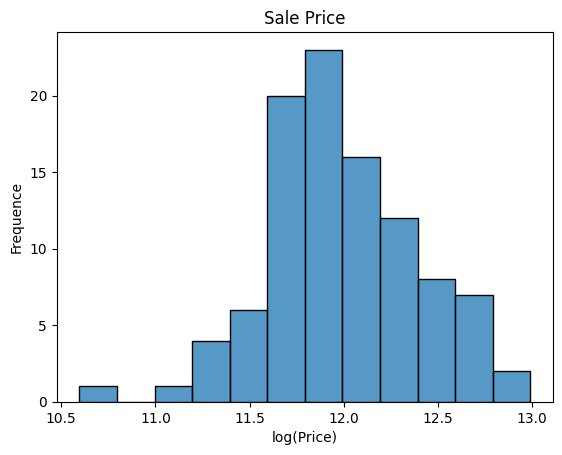

In [572]:
# histogram of log(prices)
plt.xlabel('log(Price)')
plt.ylabel('Frequence')
plt.title('Sale Price')
sns.histplot(log_price)
plt.show()

In [573]:
# the asymmetry coefficient asymmetry high
train_data['SalePrice'].skew()

1.1783462304851948

In [574]:
# the asymmetry coefficient asymmetry low because nearby 0
np.log(train_data['SalePrice']).skew()

-0.09632240207755555

How we can see, we should use log to make correct model

In [575]:
target = np.log(train_data['SalePrice'])

In [576]:
# let's look at some statistics
target.describe()

count    100.000000
mean      11.986263
std        0.402132
min       10.596635
25%       11.770372
50%       11.943082
75%       12.244089
max       12.991753
Name: SalePrice, dtype: float64

Let's build some graphs of dependences of the price of a house on its characteristics in order to assess whether there is a connection between them.

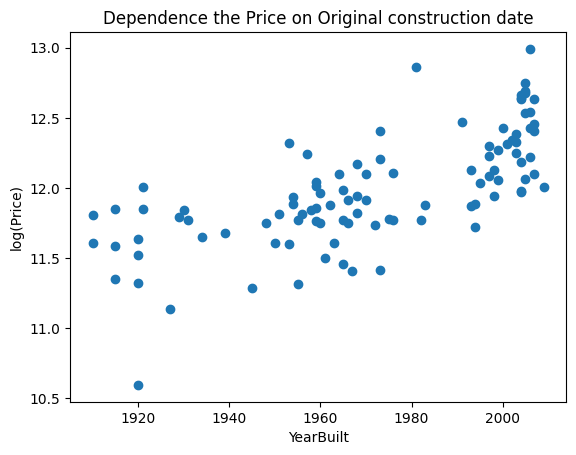

In [577]:
# How depend on Sale Price on Original construction date 

plt.xlabel('YearBuilt')
plt.ylabel('log(Price)')
plt.title('Dependence the Price on Original construction date')
plt.scatter(train_data['YearBuilt'], y = target)
plt.show()


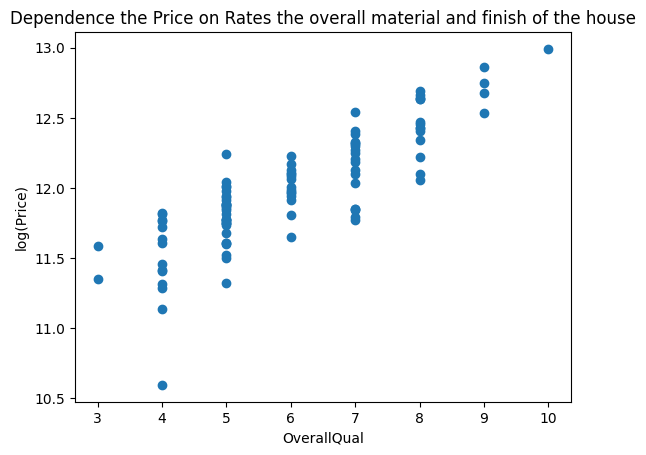

In [578]:
# How depend on Sale Price on Rates the overall material and finish of the house 
plt.xlabel('OverallQual')
plt.ylabel('log(Price)')
plt.title('Dependence the Price on Rates the overall material and finish of the house')
plt.scatter(train_data['OverallQual'], y = target)
plt.show()

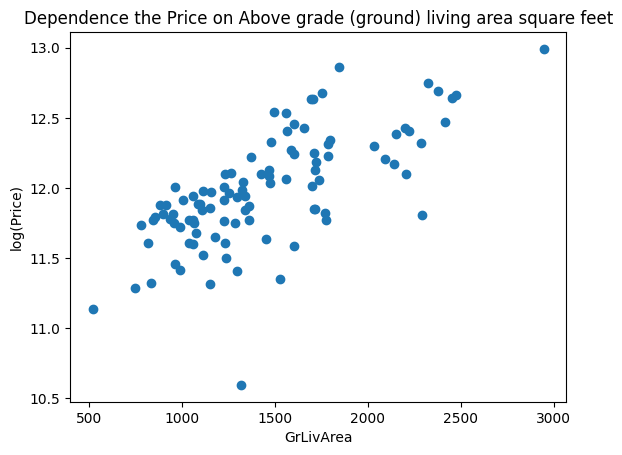

In [579]:
# How depend on Sale Price on Above grade (ground) living area square feet
plt.xlabel('GrLivArea')
plt.ylabel('log(Price)')
plt.title('Dependence the Price on Above grade (ground) living area square feet')
plt.scatter(train_data['GrLivArea'], y = target)
plt.show()

The graphs show that there is a relationship between the price of a house and some of its features. Therefore, it is necessary to determine which features are most closely related and, on their basis, build a regression model.

[Back to top](#Index)

### 2.3 Data Preparation

Let's change the data set so that only numerical features remain and determine if there are missing values in the data.


In [580]:
# choose only numerical data
train_data = train_data.select_dtypes(include=[np.number])
train_data.head()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,61,0,0,0,0,NaN,0,2,2008,208500
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,0,0,0,0,0,NaN,0,5,2007,181500
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,42,0,0,0,0,NaN,0,9,2008,223500
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,35,272,0,0,0,NaN,0,2,2006,140000
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,84,0,0,0,0,NaN,0,12,2008,250000


In [581]:
# check data set
train_data.shape

(100, 40)

In [582]:
# looking for missing values
train_data.isnull().sum().sort_values(ascending=False)[:5]

PoolQC         100
LotFrontage     14
GarageYrBlt      6
Unnamed: 0       0
OpenPorchSF      0
dtype: int64

How we can see 'PoolQC' is emty and better to delete it.

'LotFrontage' and 'GarageYrBlt' have missing values and we replace it by mean.

In [583]:
# delete column
train_data = train_data.drop('PoolQC', axis = 1)

In [584]:
#check data set
train_data.shape

(100, 39)

In [585]:
# check statistics in the column
train_data['LotFrontage'].describe()

count     86.000000
mean      71.406977
std       21.093840
min       21.000000
25%       60.000000
50%       70.000000
75%       84.000000
max      122.000000
Name: LotFrontage, dtype: float64

In [586]:
# replace missing values in the column
mean_lf = train_data['LotFrontage'].mean()
train_data['LotFrontage'] = train_data['LotFrontage'].replace(np.nan, mean_lf)


In [587]:
# check statistics in the column
train_data['GarageYrBlt'].describe()

count      94.000000
mean     1977.361702
std        26.604572
min      1900.000000
25%      1961.250000
50%      1979.000000
75%      2002.750000
max      2009.000000
Name: GarageYrBlt, dtype: float64

In [588]:
# replace missing values in the column
mean_gy = train_data['GarageYrBlt'].mean()
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].replace(np.nan, mean_gy)

In [589]:
# checking for missing values after our data preparation
train_data.isnull().sum().sort_values(ascending=False)[:5]

Unnamed: 0      0
WoodDeckSF      0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
dtype: int64

We prepared a data set that contains only numerical characteristics. Get rid of missing values. Thus, the data set is ready for further analysis and building a linear regression model based on it.

[Back to top](#Index)

### 2.4 Correlation

Let's build a table of correlation coefficients to find which characteristics have the closest relationship.

In [590]:
# correlation table
correl = train_data.corr()
correl

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Unnamed: 0,1.000000,1.000000,0.080895,0.019709,-0.049651,-0.219727,-0.164918,-0.090222,-0.024510,0.007759,...,-0.049017,-0.123503,-0.132036,-0.081108,0.083479,NaN,0.000147,-0.046654,0.053778,-0.162735
Id,1.000000,1.000000,0.080895,0.019709,-0.049651,-0.219727,-0.164918,-0.090222,-0.024510,0.007759,...,-0.049017,-0.123503,-0.132036,-0.081108,0.083479,NaN,0.000147,-0.046654,0.053778,-0.162735
MSSubClass,0.080895,0.080895,1.000000,-0.460263,-0.334735,0.051805,-0.107852,-0.050695,0.084539,0.001036,...,-0.105723,0.094580,0.060720,-0.062969,0.060624,NaN,-0.001483,0.062613,0.031432,-0.066819
LotFrontage,0.019709,0.019709,-0.460263,1.000000,0.367914,0.160570,-0.179598,0.243575,0.094015,0.192950,...,0.071806,-0.054884,-0.154921,0.160370,0.024195,NaN,0.032695,0.059296,-0.021162,0.299519
LotArea,-0.049651,-0.049651,-0.334735,0.367914,1.000000,0.341133,-0.127663,0.188510,0.120216,0.094462,...,0.520432,0.085810,-0.100110,0.049825,0.062252,NaN,0.013759,0.214738,-0.180653,0.497124
OverallQual,-0.219727,-0.219727,0.051805,0.160570,0.341133,1.000000,-0.154939,0.579579,0.493440,0.530543,...,0.336132,0.285284,-0.099157,-0.039126,0.046890,NaN,-0.075456,0.185418,-0.248507,0.855061
OverallCond,-0.164918,-0.164918,-0.107852,-0.179598,-0.127663,-0.154939,1.000000,-0.219230,-0.034425,-0.151374,...,0.083628,-0.076633,-0.079719,-0.072755,0.004177,NaN,0.085541,-0.245220,0.144101,-0.170443
YearBuilt,-0.090222,-0.090222,-0.050695,0.243575,0.188510,0.579579,-0.219230,1.000000,0.620173,0.376098,...,0.273461,0.374108,-0.556239,0.025985,0.039568,NaN,-0.002547,0.169366,-0.168681,0.658636
YearRemodAdd,-0.024510,-0.024510,0.084539,0.094015,0.120216,0.493440,-0.034425,0.620173,1.000000,0.267697,...,0.197462,0.321306,-0.344259,-0.042658,0.014370,NaN,-0.120865,0.181353,-0.035363,0.548330
MasVnrArea,0.007759,0.007759,0.001036,0.192950,0.094462,0.530543,-0.151374,0.376098,0.267697,1.000000,...,0.230396,0.102244,-0.128313,0.020448,0.033482,NaN,-0.093912,0.118239,-0.063268,0.571836


Based on the results obtained, it can be argued that a number of characteristics are closely related and can be used to build a model.

The table shows that the values of the correlation coefficient of the 'PoolArea' characteristic in all cells are NaN. Let's find the reason for this.

In [591]:
# check the column
train_data['PoolArea'].describe()

count    100.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: PoolArea, dtype: float64

How we can see 'PoolArea' doesn`t contain data only 0. That is why we delete this column.

In [592]:
# delete column
train_data = train_data.drop(columns = 'PoolArea')

To build a model, we select the features that have the closest relationship.

In [593]:
# find correlation between 'SalePrice' and other features and sort it 
correl = train_data.corr()
colls = correl['SalePrice'].sort_values(ascending=False)
colls

SalePrice        1.000000
OverallQual      0.855061
GrLivArea        0.735129
GarageArea       0.688249
GarageCars       0.663441
YearBuilt        0.658636
TotalBsmtSF      0.616297
GarageYrBlt      0.587388
FullBath         0.579505
MasVnrArea       0.571836
TotRmsAbvGrd     0.553603
1stFlrSF         0.550912
YearRemodAdd     0.548330
LotArea          0.497124
Fireplaces       0.487907
WoodDeckSF       0.451241
2ndFlrSF         0.381076
BsmtUnfSF        0.327020
HalfBath         0.319304
OpenPorchSF      0.301960
LotFrontage      0.299519
BsmtFinSF1       0.266713
MoSold           0.256863
BedroomAbvGr     0.233426
BsmtFullBath     0.155689
ScreenPorch      0.035930
3SsnPorch       -0.019391
BsmtHalfBath    -0.055100
MSSubClass      -0.066819
MiscVal         -0.134707
BsmtFinSF2      -0.138126
LowQualFinSF    -0.150027
Id              -0.162735
Unnamed: 0      -0.162735
OverallCond     -0.170443
EnclosedPorch   -0.233483
KitchenAbvGr    -0.235659
YrSold          -0.262683
Name: SalePr

<AxesSubplot: >

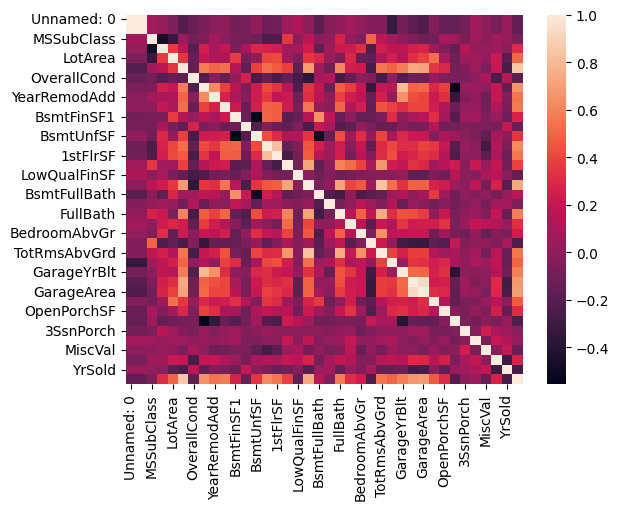

In [594]:
# the correlation matrix
sns.heatmap(train_data[2:].corr())

Select all columns that have a correlation coefficient greater than 0.5.

In [595]:
# select columnse where corr > 0.5
string_columns_1 = list(colls[colls > 0.5].index)
string_columns_1

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageArea',
 'GarageCars',
 'YearBuilt',
 'TotalBsmtSF',
 'GarageYrBlt',
 'FullBath',
 'MasVnrArea',
 'TotRmsAbvGrd',
 '1stFlrSF',
 'YearRemodAdd']

In [596]:
# select columnse where corr > 0.7
string_columns_2 = list(colls[colls > 0.7].index)

In [597]:
# select columnse where corr > 0.3
string_columns_3 = list(colls[colls > 0.3].index)

Thus, we have identified the characteristics that are most closely related to the value of the price of the house and will further apply them to build a linear regression model.


[Back to top](#Index)

## 3. Project Description

To build a linear regression model, a data set was prepared. All features with numerical values ​​were selected since the construction of a linear regression requires the use of numerical characteristics. Missing values ​​were found and replaced with means for the selected column. Features that did not contain numerical data were excluded from consideration.

For the obtained dataset, a correlation coefficient was calculated and features with a coefficient higher than 0.5 will be included in the future model. As a result, it was proposed to use 12 features, which should increase the accuracy of the model. In addition, since the normal distribution is observed on the logarithm of 'SalePrice', we use the log('SalePrice') as the target indicator, and then we will carry out the inverse transformation.


[Back to top](#Index)

### 3.1 Linear Regression

Linear regression is a basic and commonly used type of predictive analysis. 

The overall idea of regression is to examine two things: 
1.	does a set of predictor variables do a good job in predicting an outcome (dependent) variable?  
2.	which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?

These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula 

$y = c + b*x$, 

where y = estimated dependent variable score, 

c = constant, 

b = regression coefficient, 

 x = score on the independent variable.

Linear regression can be further divided into two types of the algorithm:

- Simple Linear Regression:
If a single independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Simple Linear Regression.

- Multiple Linear regression:
If more than one independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Multiple Linear Regression.

It is important to know how the relationship between the values of the x-axis and the values of the y-axis is, if there are no relationship the linear regression can not be used to predict anything.

This relationship - the coefficient of correlation - is called r.

The r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.

Python and the Scipy module will compute this value, all we have to do is feed it with the x and y values.

The package scikit-learn is a widely used Python library for machine learning, built on top of NumPy and some other packages. It provides the means for preprocessing data, reducing dimensionality, implementing regression, classifying, clustering, and more. Like NumPy, scikit-learn is also open-source.

To build a linear regression model we should implement it with Python and three open-source packages: NumPy, Pandas, scikit-learn, and statsmodels. We use NumPy and Pandas for handling data. 

Linear regression is implemented with the following:  scikit-learn if you don’t need detailed results and want to use the approach consistent with other regression techniques; statsmodels if you need the advanced statistical parameters of a model.

[Back to top](#Index)

### 3.2 Analysis 

Let's build a linear regression model.

To compare how the number of input parameters affects the adequacy of the model, we will carry out three calculations with a different number of features. Let's choose them according to the principle:
1. corr > 0.5
2. corr > 0.7
3. corr > 0.3

Then we compare the adequacy of the obtained models and choose the best

In [598]:
# import library to model
from sklearn import linear_model

In [599]:
# No1 include all columns where corr > 0.5
X_1 = pd.DataFrame()
for col in string_columns_1[1:]:
    X_1[col] = train_data[col]

Y_1 = target

lr = linear_model.LinearRegression()
model_1 = lr.fit(X_1, Y_1)
predictions_1 = model_1.predict(X_1)

model_1.score(X_1,Y_1) # coefficient of determination (model adequacy)
print('R^2 = ', model_1.score(X_1,Y_1))

R^2 =  0.8605284479801925


In [600]:
# No3 include all columns where corr > 0.7
X_2 = pd.DataFrame()
for col in string_columns_2[1:]:
    X_2[col] = train_data[col]

Y_2 = target

lr = linear_model.LinearRegression()
model_2 = lr.fit(X_2, Y_2)
predictions_2 = model_2.predict(X_2)

model_2.score(X_2,Y_2)  # coefficient of determination (model adequacy)
print('R^2 = ', model_2.score(X_2,Y_2))


R^2 =  0.743235370614387


In [601]:
# No3 include all columns where corr > 0.3
X_3 = pd.DataFrame()
for col in string_columns_3[1:]:
    X_3[col] = train_data[col]

Y_3 = target

lr = linear_model.LinearRegression()
model_3 = lr.fit(X_3, Y_3)
predictions_3 = model_3.predict(X_3)

model_3.score(X_3,Y_3) # coefficient of determination (model adequacy)
print('R^2 = ', model_3.score(X_3,Y_3))

R^2 =  0.8855519860785358


How we can see more features give us better model accuracy. In this case No3 that include all columns where corr > 0.3 has $R^2$ = 0.886.

Choose this model to predict 'SalePrice'.

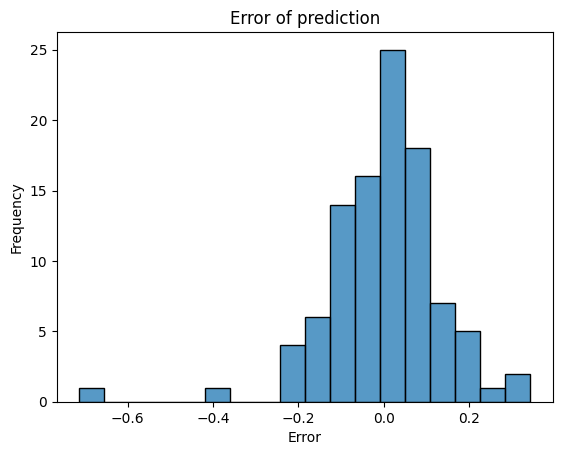

In [602]:

sns.histplot(Y_3 - predictions_3)

plt.ylabel('Frequency')
plt.xlabel('Error')
plt.title('Error of prediction')

plt.show()

The histogram that shows the error of the model looks like a normal distribution, which indicates that the resulting model is correct

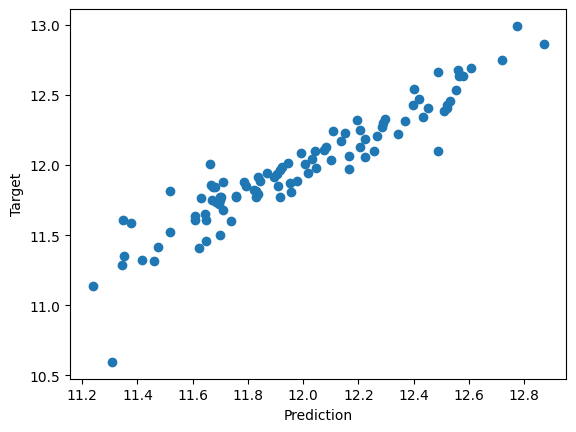

In [603]:

plt.scatter(predictions_3, Y_3)
plt.ylabel('Target')
plt.xlabel('Prediction')

plt.show()

This graph also confirms the correctness of the model obtained, since is actually a line

[Back to top](#Index)

### 3.3 Results

Thus, a model that includes a large number of features will increase the accuracy of the model. However, it should be taken into account that an increase in the number of features leads to an increase in the model running time. Therefore, in the process of its creation, this factor must be taken into account. 

In our case, linear regression is a simple machine learning model, so there was no significant change in model processing speed.


[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Here we test the model against test data to confirm its accuracy on new data. The test data is located in the file `jtest.csv`. For verification of our model, we chose the same columns. After that, we prepare data and verify the model.

In [604]:
#import data
t_data = 'jtest.csv'
test_data = pd.read_csv(t_data)
test_data.shape

(100, 82)

In [605]:
# transform target data
target = np.log(test_data['SalePrice'])

In [606]:
X = pd.DataFrame()
for col in string_columns_3[1:]:
    X[col] = test_data[col]

Y = target


In [607]:
X.isnull().sum().sort_values(ascending=False)


GarageYrBlt     9
OverallQual     0
1stFlrSF        0
HalfBath        0
BsmtUnfSF       0
2ndFlrSF        0
WoodDeckSF      0
Fireplaces      0
LotArea         0
YearRemodAdd    0
TotRmsAbvGrd    0
GrLivArea       0
MasVnrArea      0
FullBath        0
TotalBsmtSF     0
YearBuilt       0
GarageCars      0
GarageArea      0
OpenPorchSF     0
dtype: int64

In [608]:
Y.isnull().sum()

0

In [609]:
mean_gy = X['GarageYrBlt'].mean()
X['GarageYrBlt'] = X['GarageYrBlt'].replace(np.nan, mean_gy)

In [610]:
predictions_new = model_3.predict(X)
model_3.score(X, Y)
print('R^2 = ', model_3.score(X,Y))

R^2 =  0.8374361878423904


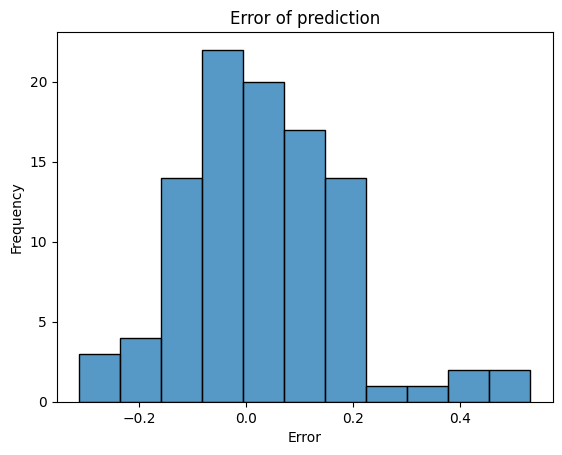

In [611]:
sns.histplot(Y - predictions_new)

plt.ylabel('Frequency')
plt.xlabel('Error')
plt.title('Error of prediction')

plt.show()

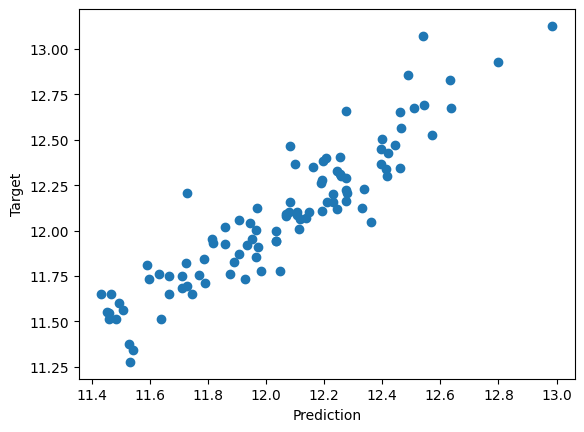

In [612]:
plt.scatter(predictions_new, Y)

plt.ylabel('Target')
plt.xlabel('Prediction')

plt.show()

The histogram and scatterplot above indicate that the model has high accuracy.

Let's build a histogram of the distribution of house prices obtained from the presented dataset and using the model.

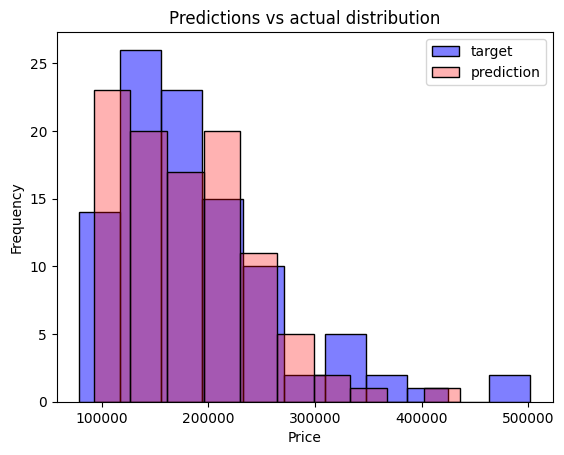

In [613]:
sns.histplot(np.exp(Y), label='target', color='b', alpha=0.5)
sns.histplot(np.exp(predictions_new), label='prediction', color='r', alpha=0.3)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Predictions vs actual distribution')

plt.show()

The resulting histogram shows that the proposed model satisfactorily predicts house prices.

[Back to top](#Index)

## Conclusion

Thus, based on the received data set, a multiple linear regression model was built to predict the cost of a house based on the available indicators.

To build the model, we preliminarily carried out data preparation work: cleared empty columns and replaced missing values.

The influence of the number of independent variables on the adequacy of the model was evaluated. It was shown that their increase makes it possible to increase the coefficient of determination.

Testing the model on the test data set confirmed that the resulting model satisfactorily predicts house prices. The resulting model has a high coefficient of determination $R^2$ = 0.886. The assessment of the reliability of the model on the test dataset confirmed the correctness of the constructed linear regression $R^2$ = 0.837.


[Back to top](#Index
)
## References

- Alexey Grigorev. “Machine Learning Bookcamp: Build a portfolio of real-life projects”,  Manning Publications Co, 502 p.
- Jason Brownlee. “Linear Regression for Machine Learning” Machine Learning Mastery. August 15, 2020. URL: https://machinelearningmastery.com/linear-regression-for-machine-learning/

- Mirko Stojiljković. “Linear Regression in Python.” Real Python. May 16, 2022. URL: https://realpython.com/linear-regression-in-python/